In [20]:
"""
Running this script generates the figures (Figures 1-1) and table (Table 1) from our paper.
"""

import numpy as np
import itertools
from matplotlib import rc, rcParams
from matplotlib import pyplot as plt
import pandas as pd
import plotting_functions
from pathlib import Path
import dataframe_image as dfi
import argparse

user = False 

if user:
    user_or_paper = "user/"
else:
    user_or_paper = "paper/"

# create figures directory if it does not exist
Path(user_or_paper + "figures").mkdir(exist_ok=True, parents=True)

# load panda dataframe 
# either paper/raw/results.pkl or user/raw/results.pkl
# depending on '-user' or user = True as explained above
Path("user/raw").mkdir(exist_ok=True, parents=True)
results_df = pd.read_pickle(user_or_paper + "raw/results.pkl")

# Parameters for plots
fs = 32
rcParams.update({"font.size": fs})
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

# define variables
approx_types = ["wild bootstrap", "permutation"]
kernel_types = ["gaussian", "laplace"]


In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def mutate(List):
    """
    Mutate a list into a list of lists except for elements of type slice.
    input: List: list
    """
    for i in range(len(List)):
        if type(List[i]) not in [list, slice]:
            List[i] = [List[i]] 


def get_data(
    df,
    exp_number,
    d=slice(None),
    approx_type=slice(None),
    kernel_type=slice(None),
    l_minus_l_plus=slice(None),
):
    """
    Extract the relevant data points given the dataframe results.pkl for the different experiments.
    inputs: df: dataframe
            exp_number: integer between 1 and 12
            d: integer between 1 and 2
            approx_types: "permutation" or "wild bootstrap"
            kernel_type: "gaussian" or "laplace"
            l_minus_l_plus: tuple of the form (l_minus,l_plus)
    output: array consisting of relevant data points for the specific experiment
    """
    exps = [
        "1: uniform alternative",
        "2: mnist alternative",
        "3: uniform alternative",
        "4: mnist alternative",
        "5: uniform null",
        "6: mnist null",
        "7: uniform alternative",
        "8: mnist alternative",
        "9: uniform alternative",
        "10: mnist alternative",
        "11: uniform alternative",
        "12: mnist alternative",
    ]
    exp = exps[exp_number - 1]
    function_type = slice(None)
    if exp_number in [1, 2]:
        function_type = ["uniform", "increasing", "decreasing", "centred", "ost"]
        List = [
            exp,
            d,
            slice(None),
            slice(None),
            slice(None),
            approx_type,
            kernel_type,
            l_minus_l_plus,
            function_type,
        ]
        mutate(List)
        return df.loc[tuple(List)].unstack().to_numpy()
    elif exp_number in [3, 4]:
        function_type = ["median", "split", "split (doubled sample sizes)"]
        List = [
            exp,
            d,
            slice(None),
            slice(None),
            slice(None),
            approx_type,
            kernel_type,
            l_minus_l_plus,
            function_type,
        ]
        mutate(List)
        return df.loc[tuple(List)].unstack().to_numpy()
    elif exp_number in [7, 8]:
        List = [
            exp,
            d,
            slice(None),
            slice(None),
            slice(None),
            approx_type,
            kernel_type,
            l_minus_l_plus,
            function_type,
        ]
        mutate(List)
        return (
            df.loc[tuple(List)].swaplevel("n", "perturbation_or_Qi").unstack().to_numpy()
        )
    elif exp_number in [9, 10]:
        if l_minus_l_plus != slice(None):
            raise ValueError(
                "l_minus_l_plus should not be specified for exp_number = 9 or 10."
            )
        List = [
            exp,
            d,
            slice(None),
            slice(None),
            slice(None),
            approx_type,
            kernel_type,
            l_minus_l_plus,
            function_type,
        ]
        mutate(List)
        return (
            df.loc[tuple(List)]
            .swaplevel("perturbation_or_Qi", "l_minus_l_plus")
            .unstack()
            .to_numpy()
        )
    elif exp_number in [11, 12]:
        if approx_type != slice(None):
            raise ValueError(
                "approx_type should either not be specified for exp_number = 11 or 12."
            )
        List = [
            exp,
            d,
            slice(None),
            slice(None),
            slice(None),
            approx_type,
            kernel_type,
            l_minus_l_plus,
            function_type,
        ]
        mutate(List)
        return df.loc[tuple(List)].unstack().to_numpy()
    else:
        raise ValueError(
            "exp_number should be an integer between 1 and 12 (excluding 5 and 6)."
        )

In [23]:
def table_2(df):
    """
    Extract data relevant to constructing the table labelled Table 1 in our paper.
    input: df: dataframe
    output: dataframe entries corresponding to Table 1.
    """
    exps = [
        "1: uniform alternative",
        "2: mnist alternative",
        "3: uniform alternative",
        "4: mnist alternative",
        "5: uniform null",
        "6: mnist null",
        "7: uniform alternative",
        "8: uniform mnist",
        "9: uniform alternative",
        "10: uniform mnist",
        "11: uniform alternative",
        "12: uniform mnist",
    ]
    d = slice(None)
    approx_type = ["wild bootstrap", "permutation"]
    kernel_type = ["gaussian", "laplace"]
    l_minus_l_plus = slice(None)
    exp = [exps[5 - 1], exps[6 - 1]]
    function_type = [
        "uniform",
        "centred",
        "increasing",
        "decreasing",
        "median",
        "split",
        "ost",
    ]
    List = [
        exp,
        slice(None),
        d,
        slice(None),
        slice(None),
        slice(None),
        kernel_type,
        approx_type,
        slice(None),
        function_type,
    ]
    mutate(List)
    columns = [("power", function_type[i]) for i in range(len(function_type))]
    levels_order = [
        "experiment",
        "perturbation_or_Qi",
        "d",
        "repetitions",
        "m",
        "n",
        "kernel_type",
        "approx_type",
        "l_minus_l_plus",
        "function_type",
    ]
    return (
        df.reorder_levels(levels_order)
        .loc[tuple(List)]
        .reindex(index=["wild bootstrap", "permutation"], level=7)
        .unstack()[columns]
    )



# Table 1

The reproducibility repository for table 1 can be found at: https://github.com/antoninschrab/FL-MMDAgg

# Table 2

In [5]:
# Table 2
dfi.export(table_2(results_df), user_or_paper + "figures/table_2.png")

# Table 3

In [6]:
# Table 3
tests = ["MMDAgg* Laplace & Gaussian", "MMDAgg* Laplace", "MMDAgg* Gaussian", "MMDAgg* All"]
bis_or_not_bis = ("", "bis")
wb_or_perm = ("wild bootstrap", "permutations")
for i in range(4):
    for s in range(2):
        print("d = 1", tests[i], wb_or_perm[s], np.load("results/exp5" + bis_or_not_bis[s] + "_" + str(i) + ".npy"))
    for s in range(2):
        print("d = 2", tests[i], wb_or_perm[s], np.load("results/exp5" + bis_or_not_bis[s] + "_" + str(i + 4) + ".npy"))
    for s in range(2):
        print("mnist", tests[i], wb_or_perm[s], np.load("results/exp6" + bis_or_not_bis[s] + "_" + str(i) + ".npy"))
    print(" ")

d = 1 MMDAgg* Laplace & Gaussian wild bootstrap [0.0496]
d = 1 MMDAgg* Laplace & Gaussian permutations [0.0496]
d = 2 MMDAgg* Laplace & Gaussian wild bootstrap [0.0434]
d = 2 MMDAgg* Laplace & Gaussian permutations [0.0438]
mnist MMDAgg* Laplace & Gaussian wild bootstrap [0.0632]
mnist MMDAgg* Laplace & Gaussian permutations [0.0628]
 
d = 1 MMDAgg* Laplace wild bootstrap [0.0506]
d = 1 MMDAgg* Laplace permutations [0.0528]
d = 2 MMDAgg* Laplace wild bootstrap [0.0458]
d = 2 MMDAgg* Laplace permutations [0.0456]
mnist MMDAgg* Laplace wild bootstrap [0.0624]
mnist MMDAgg* Laplace permutations [0.0612]
 
d = 1 MMDAgg* Gaussian wild bootstrap [0.05]
d = 1 MMDAgg* Gaussian permutations [0.0492]
d = 2 MMDAgg* Gaussian wild bootstrap [0.0428]
d = 2 MMDAgg* Gaussian permutations [0.0438]
mnist MMDAgg* Gaussian wild bootstrap [0.0624]
mnist MMDAgg* Gaussian permutations [0.062]
 
d = 1 MMDAgg* All wild bootstrap [0.0492]
d = 1 MMDAgg* All permutations [0.0494]
d = 2 MMDAgg* All wild bootstrap 

# Figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


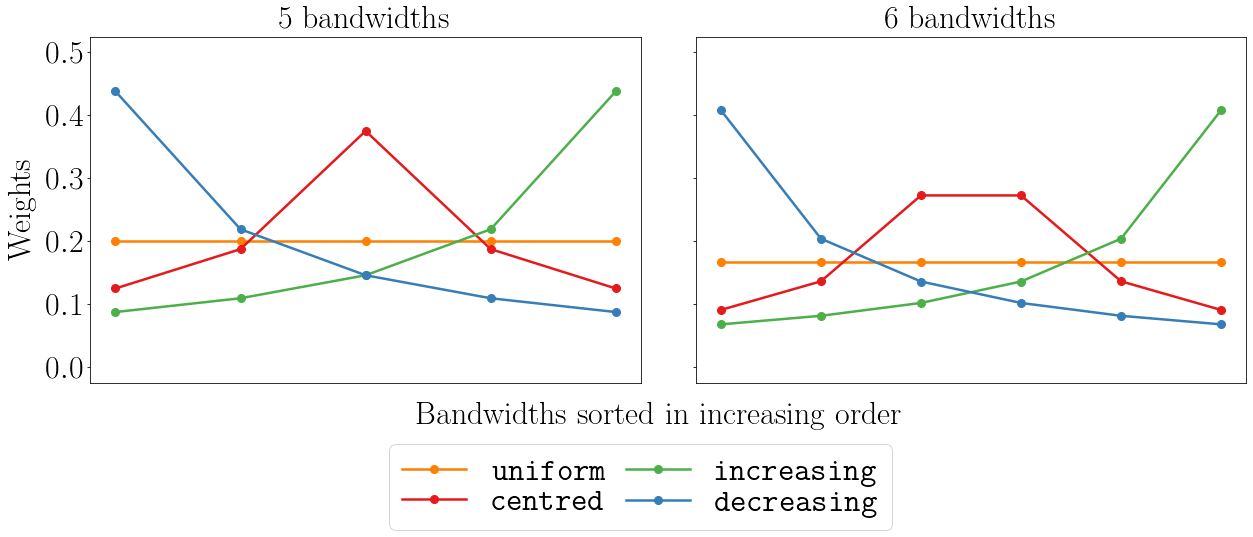

In [7]:
# Figure 1
mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(1, 2, figsize=(width, height - 1), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.1, hspace=0.45)

plotting_functions.plot_fig_1(f, axs)
axs[0].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    labelspacing=0.05,
    columnspacing=0.6,
    loc="lower center",
    bbox_to_anchor=(1, -0.47),
)
f.savefig(user_or_paper + "figures/figure_1.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_1.eps", dpi=300, bbox_inches="tight")



# Figure 2

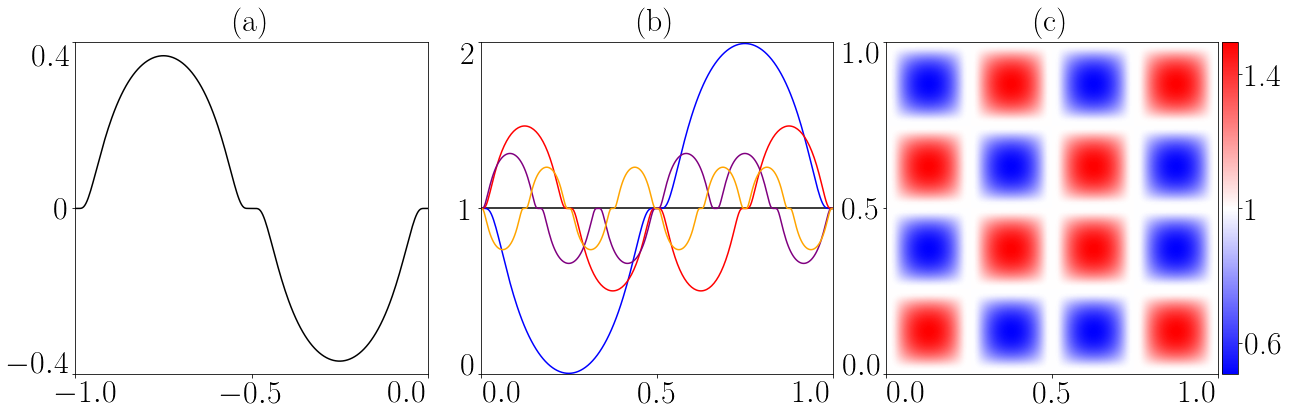

In [8]:
# Figure 2
mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(1, 3, figsize=(width, height - 1.2))
f.tight_layout()
f.subplots_adjust(wspace=0.15, hspace=0.25)

plotting_functions.plot_fig_2(f, axs)
f.savefig(user_or_paper + "figures/figure_2.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_2.eps", dpi=300, bbox_inches="tight")


# Figure 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


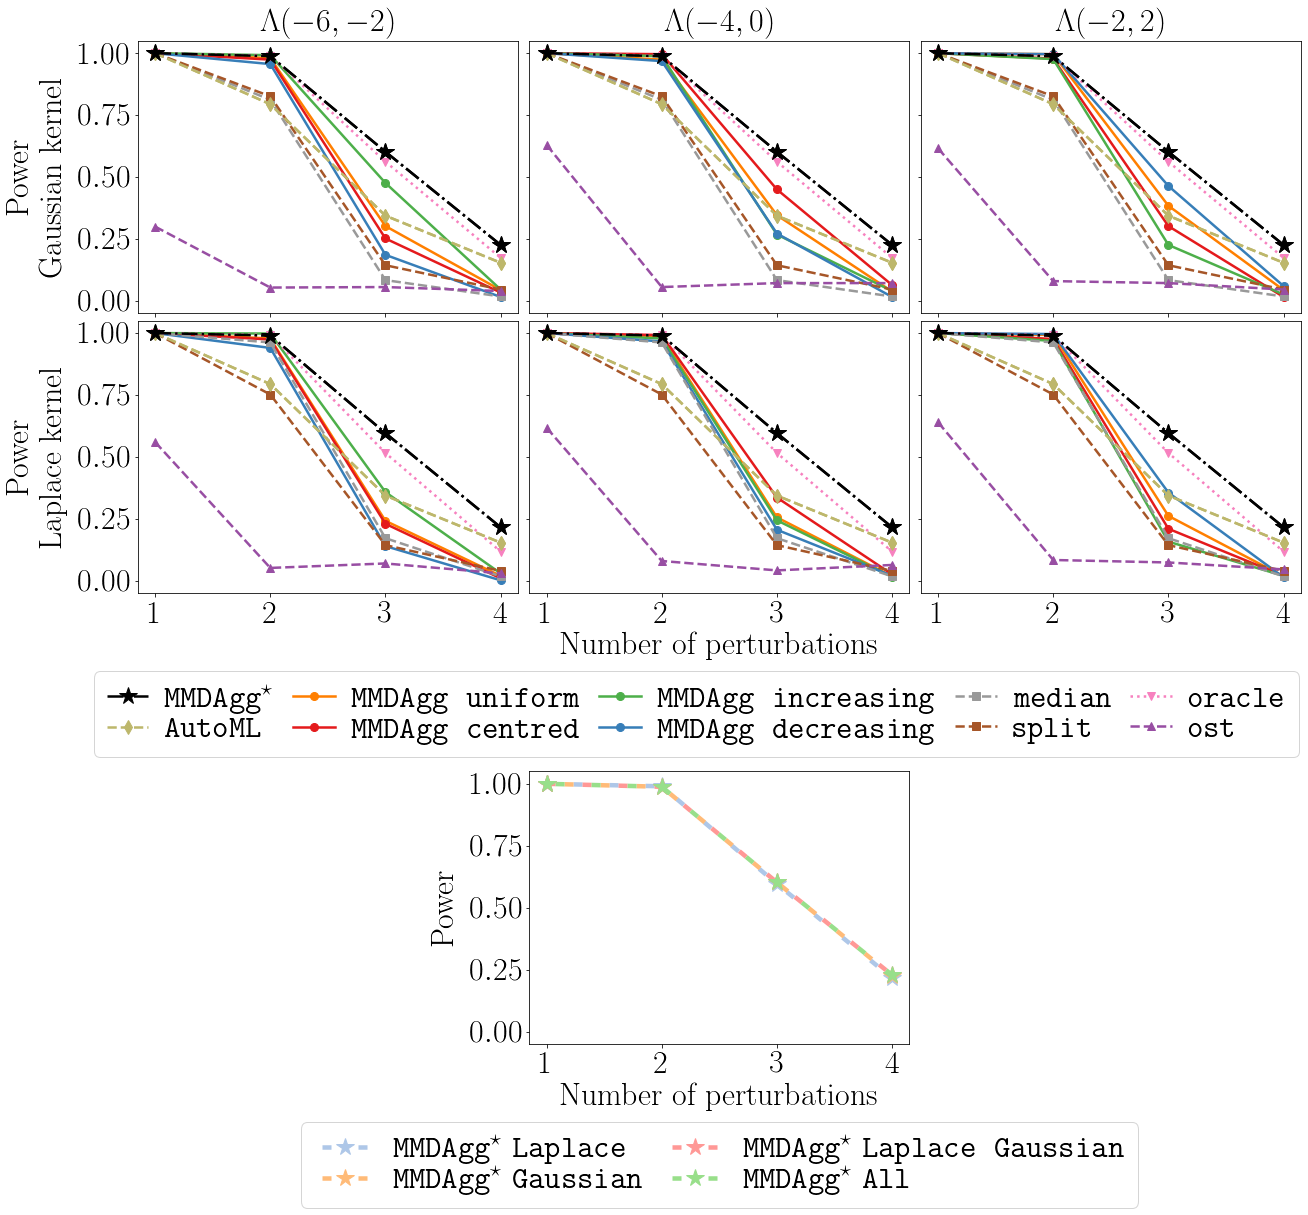

In [28]:
# Figure 3
mmdagg_LG = np.load("results/exp1_0.npy")
mmdagg_L = np.load("results/exp1_1.npy")
mmdagg_G = np.load("results/exp1_2.npy")
mmdagg_A = np.load("results/exp1_3.npy")

autotst = np.load("results/autotst_exp1_0.npy")

linewidth = 2.5
markersize = 8
fs = 32
x_values = [1, 2, 3, 4]

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(4, 3, figsize=(width, (height + 2) * 3.3 / 2), sharey=True, sharex=True, gridspec_kw={'height_ratios': [1, 1, 0.6, 1]})
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

for i in range(3):
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    
L = [(-6, -2), (-4, 0), (-2, 2)]
d = 1
a = 0
for k, l in itertools.product(range(2), range(3)):
    idxy = (k, l)
    power_ms = get_data(
        results_df, 3, d=d, approx_type=approx_types[a], kernel_type=kernel_types[k]
    )
    power = get_data(
        results_df,
        1,
        d=d,
        approx_type=approx_types[a],
        kernel_type=kernel_types[k],
        l_minus_l_plus=L[l],
    )
    plotting_functions.plot_fig_3_4(*idxy, f, axs, power, power_ms, *L[l])

for i in range(3):
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
    
axs[1, 1].legend(
    fontsize=fs,
    ncol=5,
    handleheight=0.5,
    handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.44, -0.66),
)

axs[3, 1].plot(
    x_values,
    mmdagg_L,
    "#AEC7E8",
    marker="*",
    linestyle=(2, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_G,
    "#FFBB78",
    marker="*",
    linestyle=(4, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_LG,
    "#FF9896",
    marker="*",
    linestyle=(0, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_A,
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

# for labels
axs[3, 1].plot(
    x_values[0],
    mmdagg_L[0],
    "#AEC7E8",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_G[0],
    "#FFBB78",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_LG[0],
    "#FF9896",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_A[0],
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

from matplotlib.lines import Line2D
lineG = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#FFBB78")
lineL = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#AEC7E8")
lineLG = Line2D([0,1],[0,1], linestyle=(0, (2, 6)), marker="*", color="#FF9896")
lineA = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#98DF8A")

axs[3, 1].tick_params(labelbottom=True, labelleft=True)
axs[3, 1].set_xlabel("Number of perturbations", fontsize=fs)
axs[3, 1].set_ylabel("Power", fontsize=fs, labelpad=10)
axs[3, 1].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    #handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.66),
)

axs[2, 0].axis('off')
axs[3, 0].axis('off')
axs[2, 1].axis('off')
axs[2, 2].axis('off')
axs[3, 2].axis('off')

f.savefig(user_or_paper + "figures/figure_3.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_3.eps", dpi=300, bbox_inches="tight")

# Figure 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


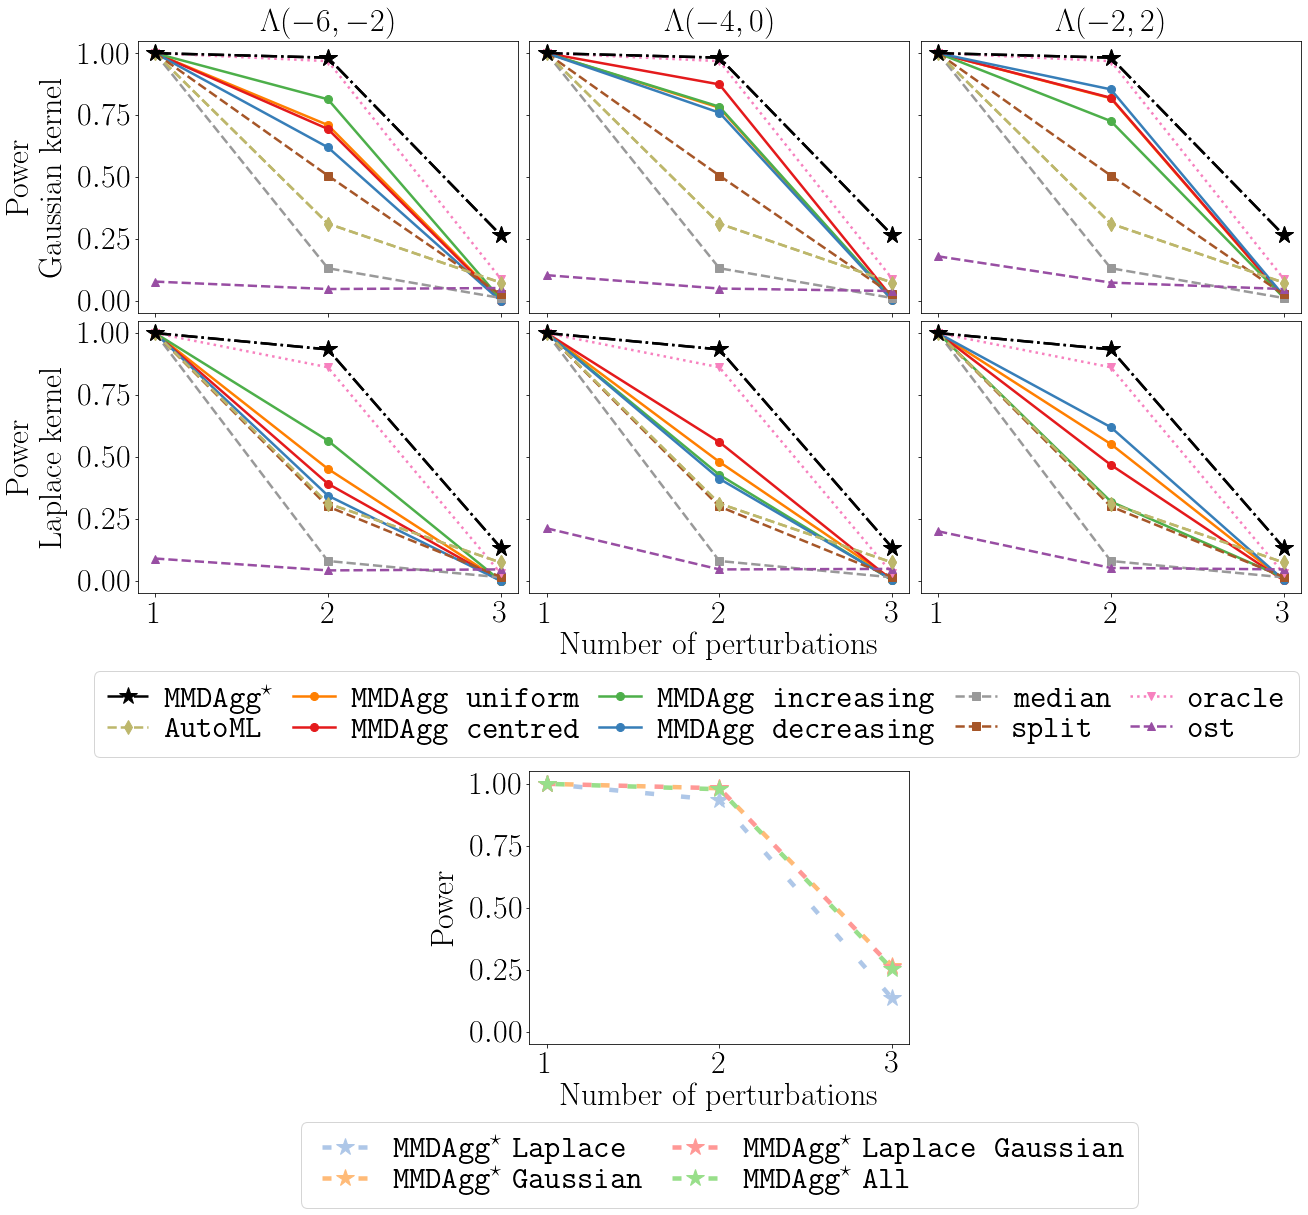

In [31]:
# Figure 4
mmdagg_LG = np.load("results/exp1_4.npy")
mmdagg_L = np.load("results/exp1_5.npy")
mmdagg_G = np.load("results/exp1_6.npy")
mmdagg_A = np.load("results/exp1_7.npy")

autotst = np.load("results/autotst_exp1_1.npy")

linewidth = 2.5
markersize = 8
fs = 32
x_values = [1, 2, 3]

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(4, 3, figsize=(width, (height + 2) * 3.3 / 2), sharey=True, sharex=True, gridspec_kw={'height_ratios': [1, 1, 0.6, 1]})
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

for i in range(3):
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
    
L = [(-6, -2), (-4, 0), (-2, 2)]
d = 2
a = 0
for k, l in itertools.product(range(2), range(3)):
    idxy = (k, l)
    power_ms = get_data(
        results_df, 3, d=d, approx_type=approx_types[a], kernel_type=kernel_types[k]
    )
    power = get_data(
        results_df,
        1,
        d=d,
        approx_type=approx_types[a],
        kernel_type=kernel_types[k],
        l_minus_l_plus=L[l],
    )
    plotting_functions.plot_fig_3_4(*idxy, f, axs, power, power_ms, *L[l])

for i in range(3):
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
    
axs[1, 1].legend(
    fontsize=fs,
    ncol=5,
    handleheight=0.5,
    handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.44, -0.66),
)

axs[3, 1].plot(
    x_values,
    mmdagg_L,
    "#AEC7E8",
    marker="*",
    linestyle=(2, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_G,
    "#FFBB78",
    marker="*",
    linestyle=(4, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_LG,
    "#FF9896",
    marker="*",
    linestyle=(0, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_A,
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

# for labels
axs[3, 1].plot(
    x_values[0],
    mmdagg_L[0],
    "#AEC7E8",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_G[0],
    "#FFBB78",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_LG[0],
    "#FF9896",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_A[0],
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

from matplotlib.lines import Line2D
lineG = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#FFBB78")
lineL = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#AEC7E8")
lineLG = Line2D([0,1],[0,1], linestyle=(0, (2, 6)), marker="*", color="#FF9896")
lineA = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#98DF8A")

axs[3, 1].tick_params(labelbottom=True, labelleft=True)
axs[3, 1].set_xlabel("Number of perturbations", fontsize=fs)
axs[3, 1].set_ylabel("Power", fontsize=fs, labelpad=10)
axs[3, 1].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    #handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.66),
)

axs[2, 0].axis('off')
axs[3, 0].axis('off')
axs[2, 1].axis('off')
axs[2, 2].axis('off')
axs[3, 2].axis('off')

f.savefig(user_or_paper + "figures/figure_4.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_4.eps", dpi=300, bbox_inches="tight")

# Figure 5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


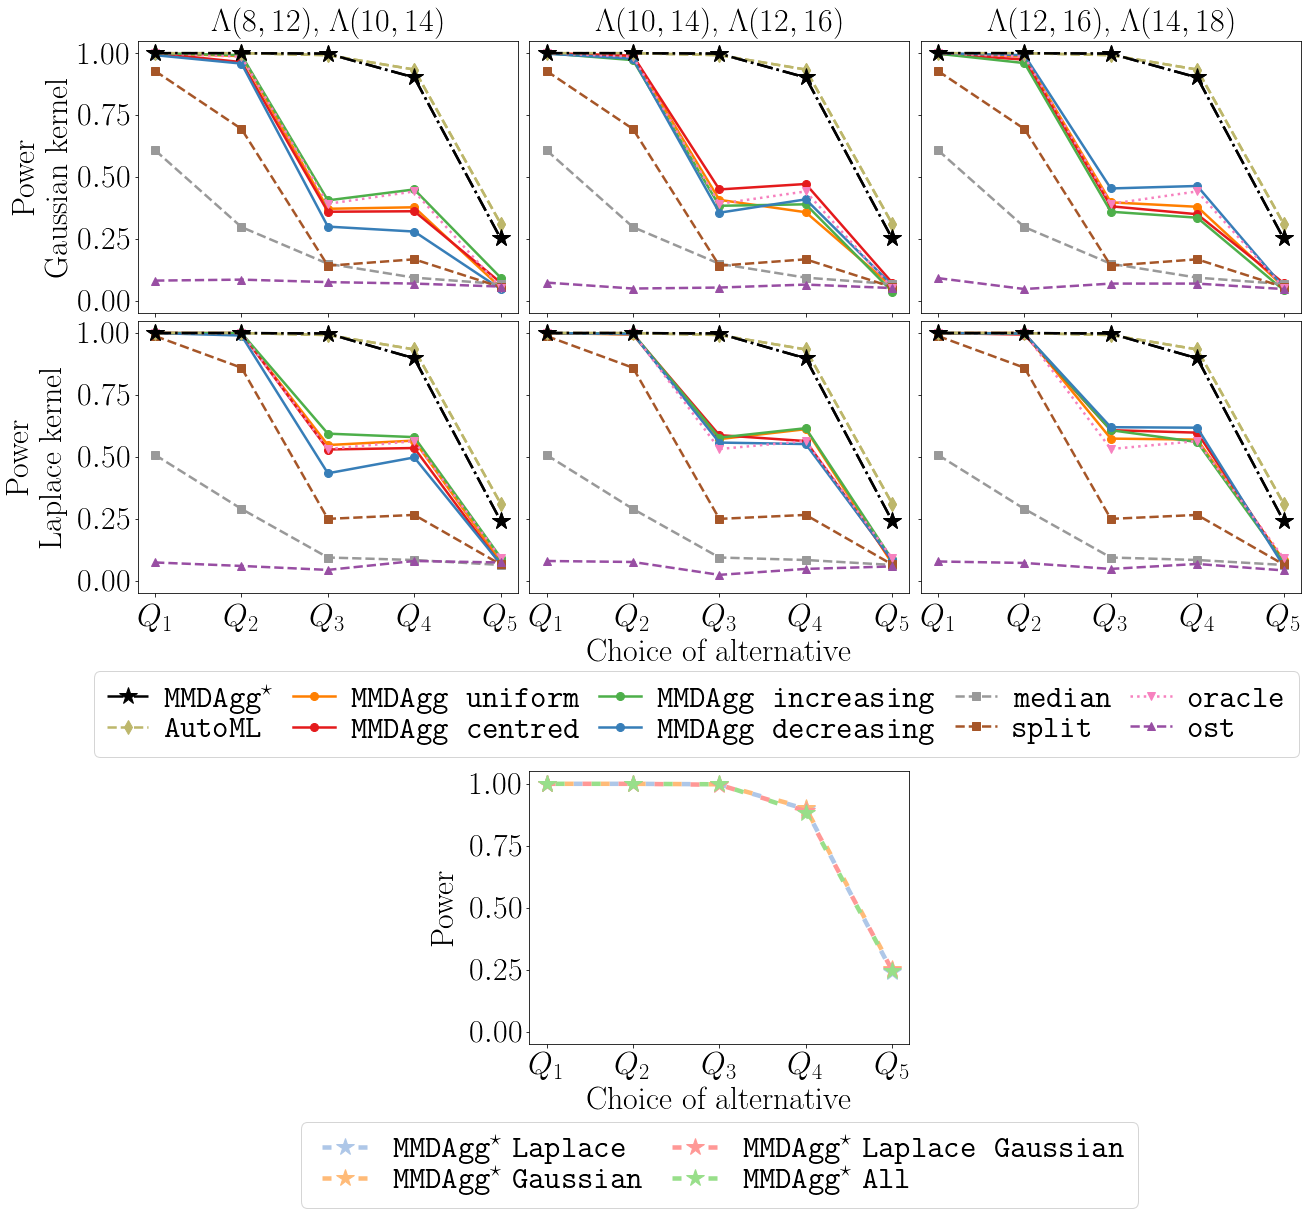

In [36]:
# Figure 5
mmdagg_LG = np.load("results/exp2_0.npy")
mmdagg_L = np.load("results/exp2_1.npy")
mmdagg_G = np.load("results/exp2_2.npy")
mmdagg_A = np.load("results/exp2_3.npy")

autotst = np.load("results/autotst_exp2_0.npy")

linewidth = 2.5
markersize = 8
fs = 32
x_values = ["$Q_1$", "$Q_2$", "$Q_3$", "$Q_4$", "$Q_5$"]

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(4, 3, figsize=(width, (height + 2) * 3.3 / 2), sharey=True, sharex=True, gridspec_kw={'height_ratios': [1, 1, 0.6, 1]})
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

for i in range(3):
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        label=r"\texttt{AutoML}",
        markersize=markersize + 2,
    )
    
L = [[(8, 12), (10, 14), (12, 16)], [(10, 14), (12, 16), (14, 18)]]
a = 0
for k, l in itertools.product(range(2), range(3)):
    idxy = (k, l)
    power_ms = get_data(
        results_df, 4, approx_type=approx_types[a], kernel_type=kernel_types[k]
    )
    power = get_data(
        results_df,
        2,
        approx_type=approx_types[a],
        kernel_type=kernel_types[k],
        l_minus_l_plus=L[k][l],
    )
    plotting_functions.plot_fig_5(*idxy, f, axs, power, power_ms)

for i in range(3):
    axs[1, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[1, i].plot(
        x_values,
        mmdagg_L,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values,
        autotst,
        "darkkhaki",
        marker="d",
        linestyle="--",
        linewidth=linewidth,
        markersize=markersize + 2,
    )
    axs[0, i].plot(
        x_values,
        mmdagg_G,
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
    
axs[1, 1].legend(
    fontsize=fs,
    ncol=5,
    handleheight=0.5,
    handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.44, -0.66),
)

axs[3, 1].plot(
    x_values,
    mmdagg_L,
    "#AEC7E8",
    marker="*",
    linestyle=(2, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_G,
    "#FFBB78",
    marker="*",
    linestyle=(4, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_LG,
    "#FF9896",
    marker="*",
    linestyle=(0, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values,
    mmdagg_A,
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    #label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

# for labels
axs[3, 1].plot(
    x_values[0],
    mmdagg_L[0],
    "#AEC7E8",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_G[0],
    "#FFBB78",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_LG[0],
    "#FF9896",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[3, 1].plot(
    x_values[0],
    mmdagg_A[0],
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

from matplotlib.lines import Line2D
lineG = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#FFBB78")
lineL = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#AEC7E8")
lineLG = Line2D([0,1],[0,1], linestyle=(0, (2, 6)), marker="*", color="#FF9896")
lineA = Line2D([0,1], [0,1], linestyle=(0, (2, 6)), marker="*", color="#98DF8A")

axs[3, 1].tick_params(labelbottom=True, labelleft=True)
axs[3, 1].set_xlabel("Choice of alternative", fontsize=fs, labelpad=8)
axs[3, 1].set_ylabel("Power", fontsize=fs, labelpad=10)
axs[3, 1].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    #handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.66),
)

axs[2, 0].axis('off')
axs[3, 0].axis('off')
axs[2, 1].axis('off')
axs[2, 2].axis('off')
axs[3, 2].axis('off')

f.savefig(user_or_paper + "figures/figure_5.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_5.eps", dpi=300, bbox_inches="tight")

# Figure 6

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


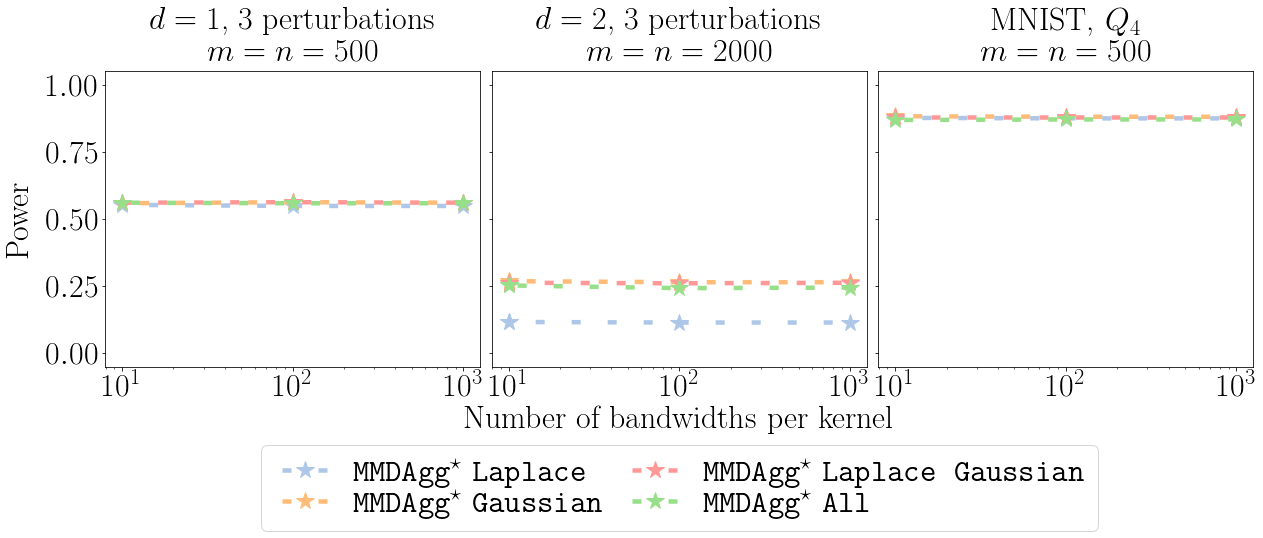

In [25]:
# Figure 6

linewidth = 2.5
markersize = 8
fs = 32

mmdagg_LG = (np.load("results/exp9_0.npy"), np.load("results/exp9_4.npy"), np.load("results/exp10_0.npy"))
mmdagg_L  = (np.load("results/exp9_1.npy"), np.load("results/exp9_5.npy"), np.load("results/exp10_1.npy"))
mmdagg_G  = (np.load("results/exp9_2.npy"), np.load("results/exp9_6.npy"), np.load("results/exp10_2.npy"))
mmdagg_A  = (np.load("results/exp9_3.npy"), np.load("results/exp9_7.npy"), np.load("results/exp10_3.npy"))

x_values = [10, 100, 1000]

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (1 / 3)
f, axs = plt.subplots(1, 3, figsize=(width, height + 2), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)
    
for i in range(3):
    axs[i].set_yticks([0, 0.25, 0.5, 0.75, 1])
    axs[i].set_ylim([-0.05, 1.05])
    axs[i].set_xticks(x_values)
    axs[i].set_xscale('log')
    axs[i].plot(
        x_values,
        mmdagg_L[i],
        "#AEC7E8",
        marker="*",
        linestyle=(2, (2, 6)),
        #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
        linewidth=linewidth + 2,
        markersize=markersize + 10,
    )
    axs[i].plot(
        x_values,
        mmdagg_G[i],
        "#FFBB78",
        marker="*",
        linestyle=(4, (2, 6)),
        #label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
        linewidth=linewidth + 2,
        markersize=markersize + 10,
    )
    axs[i].plot(
        x_values,
        mmdagg_LG[i],
        "#FF9896",
        marker="*",
        linestyle=(0, (2, 6)),
        #label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
        linewidth=linewidth + 2,
        markersize=markersize + 10,
    )
    axs[i].plot(
        x_values,
        mmdagg_A[i],
        "#98DF8A",
        marker="*",
        linestyle=(6, (2, 6)),
        #label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
        linewidth=linewidth + 2,
        markersize=markersize + 10,
    )
    
# for labels
axs[1].plot(
    x_values[0],
    mmdagg_L[1][0],
    "#AEC7E8",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[1].plot(
    x_values[0],
    mmdagg_G[1][0],
    "#FFBB78",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[1].plot(
    x_values[0],
    mmdagg_LG[1][0],
    "#FF9896",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{Laplace Gaussian}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)
axs[1].plot(
    x_values[0],
    mmdagg_A[1][0],
    "#98DF8A",
    marker="*",
    linestyle=(6, (2, 6)),
    label=r"\texttt{MMDAgg}$^\star$ \texttt{All}",
    linewidth=linewidth + 2,
    markersize=markersize + 10,
)

axs[0].set_title(
    "$d=1$, 3 perturbations\n$m=n=500$",
    fontsize=fs,
    pad=10,
)

axs[1].set_title(
    "$d=2$, 3 perturbations\n$m=n=2000$",
    fontsize=fs,
    pad=10,
)

axs[2].set_title(
    "MNIST, $Q_4$\n$m=n=500$",
    fontsize=fs,
    pad=10,
)
    
axs[1].set_xlabel("Number of bandwidths per kernel", fontsize=fs)
axs[0].set_ylabel("Power", fontsize=fs, labelpad=10)
axs[1].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    #handlelength=1.3,
    labelspacing=0.05,
    columnspacing=0.6,
    handletextpad=0.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.61),
)
f.savefig(user_or_paper + "figures/figure_6.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_6.eps", dpi=300, bbox_inches="tight")

# Figure 7

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


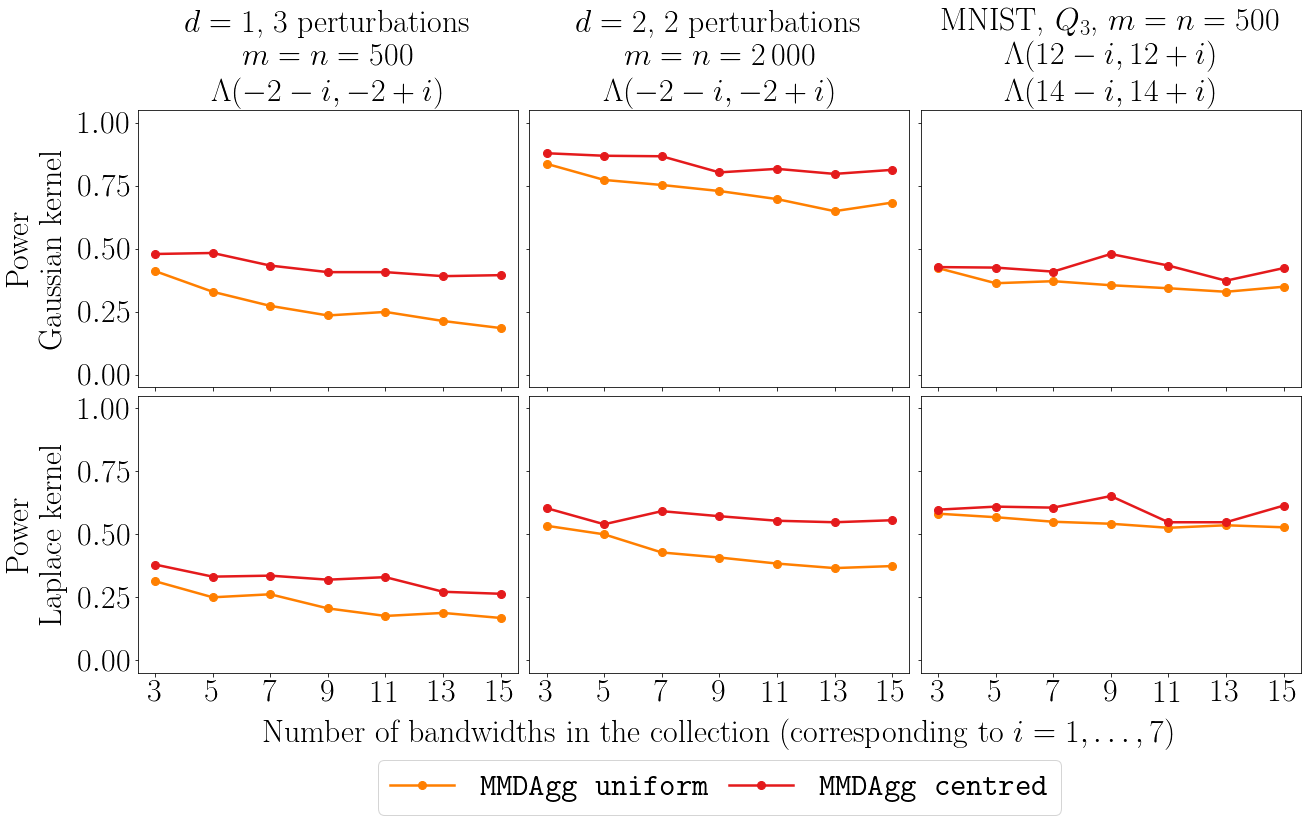

In [13]:
# Figure 7

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(
    2, 3, figsize=(width, height + 2), sharey=True, sharex=True
)  # ,figsize=(5.326,3.562)) ,sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

a = 0
for k, e in itertools.product(range(2), range(3)):
    idxy = (k, e)
    if e == 2:
        power = get_data(
            results_df, 10, approx_type=approx_types[a], kernel_type=kernel_types[k]
        )
    else:
        power = get_data(
            results_df,
            9,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
        )
    plotting_functions.plot_fig_6(*idxy, f, axs, power)

axs[1, 1].legend(
    fontsize=fs,
    ncol=2,
    handleheight=0.5,
    labelspacing=0.05,
    columnspacing=0.6,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.57),
)
f.savefig(user_or_paper + "figures/figure_7.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_7.eps", dpi=300, bbox_inches="tight")


# Figure 8

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


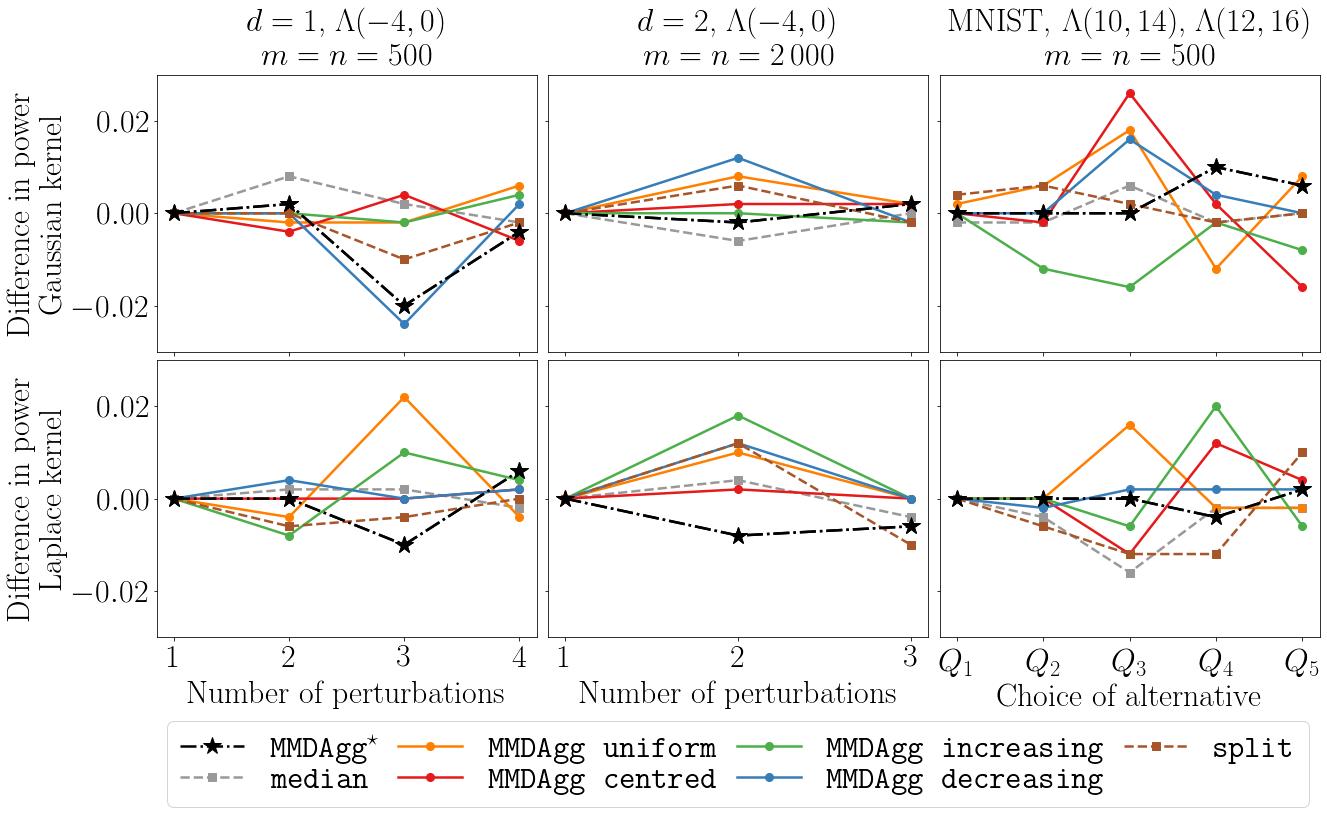

In [37]:
# Figure 8

mmdagg_L_unifd1 = np.load("results/exp1_1.npy") - np.load("results/exp1bis_1.npy")
mmdagg_G_unifd1 = np.load("results/exp1_2.npy") - np.load("results/exp1bis_2.npy")

mmdagg_L_unifd2 = np.load("results/exp1_5.npy") - np.load("results/exp1bis_5.npy")
mmdagg_G_unifd2 = np.load("results/exp1_6.npy") - np.load("results/exp1bis_6.npy")

mmdagg_L_mnist = np.load("results/exp2_1.npy") - np.load("results/exp2bis_1.npy")
mmdagg_G_mnist = np.load("results/exp2_2.npy") - np.load("results/exp2bis_2.npy")

mmdagg_L = [mmdagg_L_unifd1, mmdagg_L_unifd2, mmdagg_L_mnist]
mmdagg_G = [mmdagg_G_unifd1, mmdagg_G_unifd2, mmdagg_G_mnist]

x_values = ([i + 1 for i in range(4)], [i + 1 for i in range(3)], ["$Q_1$", "$Q_2$", "$Q_3$", "$Q_4$", "$Q_5$"])

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(2, 3, figsize=(width, height + 2), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

for i in range(3):
    axs[1, i].plot(
        x_values[i],
        mmdagg_L[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values[i],
        mmdagg_G[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )

L = [(-4, 0), [(10, 14), (12, 16)]]
a = 0
for k, e in itertools.product(range(2), range(3)):
    idxy = (k, e)
    if e == 2:
        a = 0
        power_ms_wb = get_data(
            results_df, 4, approx_type=approx_types[a], kernel_type=kernel_types[k]
        )[:-1]
        power_wb = get_data(
            results_df,
            2,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[1][k],
        )
        a = 1
        power_ms_p = get_data(
            results_df, 4, approx_type=approx_types[a], kernel_type=kernel_types[k]
        )[:-1]
        power_p = get_data(
            results_df,
            2,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[1][k],
        )
        power_ms = power_ms_wb - power_ms_p
        power = power_wb - power_p
    else:
        a = 0
        power_ms_wb = get_data(
            results_df,
            3,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
        )[:-1]
        power_wb = get_data(
            results_df,
            1,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[0],
        )
        a = 1
        power_ms_p = get_data(
            results_df,
            3,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
        )[:-1]
        power_p = get_data(
            results_df,
            1,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[0],
        )
        power_ms = power_ms_wb - power_ms_p
        power = power_wb - power_p
    plotting_functions.plot_fig_7(*idxy, f, axs, power, power_ms)


for i in range(3):
    axs[1, i].plot(
        x_values[i],
        mmdagg_L[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values[i],
        mmdagg_G[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
    
axs[1, 1].legend(
    fontsize=fs,
    ncol=4,
    handleheight=0.5,
    labelspacing=0.05,
    columnspacing=0.6,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.67),
)
f.savefig(user_or_paper + "figures/figure_8.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_8.eps", dpi=300, bbox_inches="tight")



# Figure 9

<ipython-input-38-9b8b60b2d317>:49: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axs[1, 1].plot([], [], color="none", label=" ")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


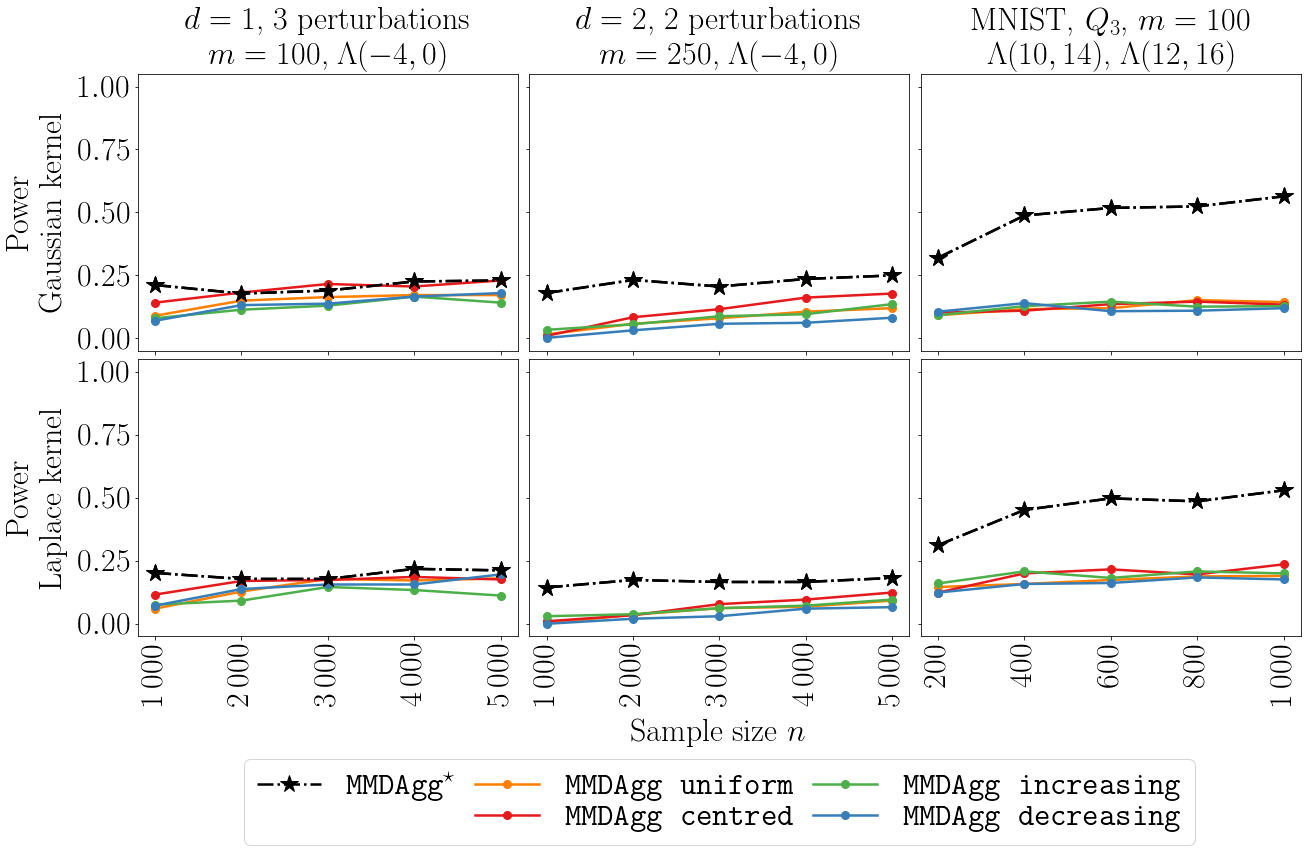

In [38]:
# Figure 9

mmdagg_L_unifd1 = np.load("results/exp7_1.npy")
mmdagg_G_unifd1 = np.load("results/exp7_2.npy")

mmdagg_L_unifd2 = np.load("results/exp7_5.npy")
mmdagg_G_unifd2 = np.load("results/exp7_6.npy")

mmdagg_L_mnist = np.load("results/exp8_1.npy") 
mmdagg_G_mnist = np.load("results/exp8_2.npy") 

mmdagg_L = [mmdagg_L_unifd1, mmdagg_L_unifd2, mmdagg_L_mnist]
mmdagg_G = [mmdagg_G_unifd1, mmdagg_G_unifd2, mmdagg_G_mnist]

x_values = (["$1\,000$", "$2\,000$", "$3\,000$", "$4\,000$", "$5\,000$"], 
            ["$1\,000$", "$2\,000$", "$3\,000$", "$4\,000$", "$5\,000$"],
            ["200", "400", "600", "800", "$1\,000$"])

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(2, 3, figsize=(width, height + 2), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

for i in range(3):
    axs[1, i].plot(
        x_values[i],
        mmdagg_L[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values[i],
        mmdagg_G[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        label=r"\texttt{MMDAgg}$^\star$",
        markersize=markersize + 10,
    )
    
axs[1, 1].plot([], [], color="none", label=" ")
    
a = 1
for k, e in itertools.product(range(2), range(3)):
    idxy = (k, e)
    if e == 2:
        power = get_data(
            results_df, 8, approx_type=approx_types[a], kernel_type=kernel_types[k]
        )
    else:
        power = get_data(
            results_df,
            7,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
        )
    plotting_functions.plot_fig_8(*idxy, f, axs, power)

for i in range(3):
    axs[1, i].plot(
        x_values[i],
        mmdagg_L[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
for i in range(3):
    axs[0, i].plot(
        x_values[i],
        mmdagg_G[i],
        "black",
        marker="*",
        linestyle="-.",
        linewidth=linewidth,
        markersize=markersize + 10,
    )
    
axs[1, 1].legend(
    fontsize=fs,
    ncol=3,
    handleheight=0.5,
    labelspacing=0.05,
    columnspacing=0.6,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.81),
)
f.savefig(user_or_paper + "figures/figure_9.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_9.eps", dpi=300, bbox_inches="tight")


# Figure 10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


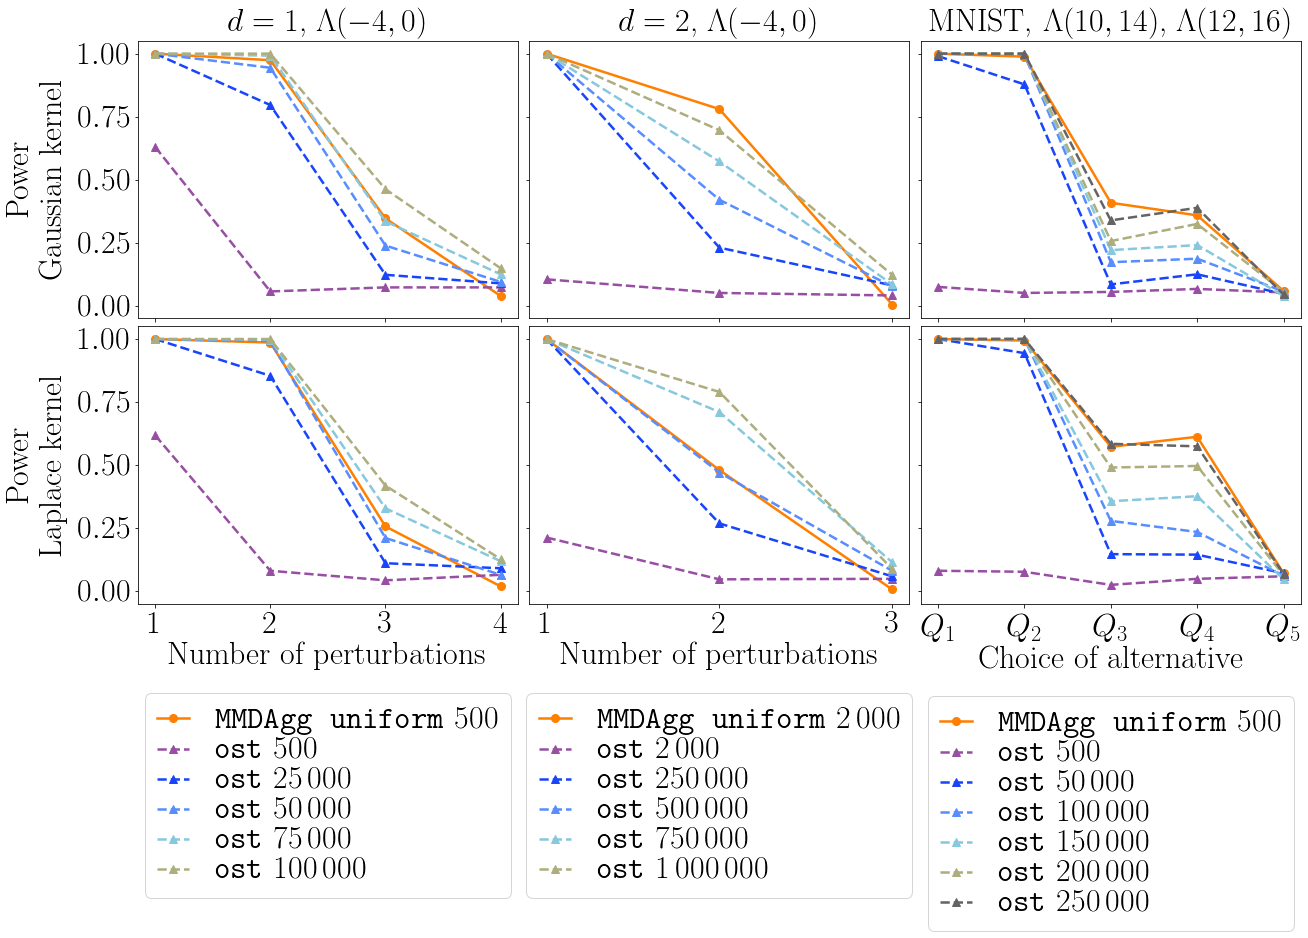

In [16]:
# Figure 10

mult = 3
width = 433.62 / 72.27 * mult
height = width * (5 ** 0.5 - 1) / 2 * (2 / 3)
f, axs = plt.subplots(2, 3, figsize=(width, height + 2), sharey=True)
f.tight_layout()
f.subplots_adjust(wspace=0.03, hspace=0.03)

L = [(-4, 0), [(10, 14), (12, 16)]]
a = 0
for k, e in itertools.product(range(2), range(3)):
    idxy = (k, e)
    if e == 2:
        power = get_data(results_df, 12, kernel_type=kernel_types[k])
        power_u = get_data(
            results_df,
            2,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[1][k],
        )[0]
        power_o = get_data(
            results_df,
            2,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[1][k],
        )[4]
    else:
        power = get_data(results_df, 11, d=e + 1, kernel_type=kernel_types[k])
        power_u = get_data(
            results_df,
            1,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[0],
        )[0]
        power_o = get_data(
            results_df,
            1,
            d=e + 1,
            approx_type=approx_types[a],
            kernel_type=kernel_types[k],
            l_minus_l_plus=L[0],
        )[4]
    plotting_functions.plot_fig_9(*idxy, f, axs, power, power_u, power_o)

axs[1, 0].legend(
    fontsize=fs,
    ncol=1,
    handleheight=0.5,
    labelspacing=0.05,
    handlelength=1,
    columnspacing=0.2,
    loc="lower center",
    bbox_to_anchor=(0.5, -1.12),
)
axs[1, 1].legend(
    fontsize=fs,
    ncol=1,
    handleheight=0.5,
    labelspacing=0.05,
    handlelength=1,
    columnspacing=0.2,
    loc="lower center",
    bbox_to_anchor=(0.5, -1.12),
)
axs[1, 2].legend(
    fontsize=fs,
    ncol=1,
    handleheight=0.5,
    labelspacing=0.05,
    handlelength=1,
    columnspacing=0.2,
    loc="lower center",
    bbox_to_anchor=(0.5, -1.239),
)
f.savefig(user_or_paper + "figures/figure_10.png", dpi=300, bbox_inches="tight")
f.savefig(user_or_paper + "figures/figure_10.eps", dpi=300, bbox_inches="tight")
